# **Initialize**

## **Mount google drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## **Import packages**

In [2]:
pip install fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! [ -e /content ] && pip install -Uqq fastai 

In [4]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 11.3 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import pandas as pd
import pickle
import os

import copy

import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Dataset, random_split

from torchvision import transforms
from torchvision.utils import make_grid
import torchvision.transforms.functional as tf
from torchvision import models

from fastai.basics import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.widgets import *

import sklearn as sk 

import fastbook
fastbook.setup_book()
from fastbook import *

In [6]:
#sys.path.append('gdrive/MyDrive/GW_QML_project/GW_Samuel/notebooks/lib')
##!cp gdrive/MyDrive/GW_QML_project/GW_Samuel/notebooks/lib/ML_tools.py .

In [7]:
#from ML_tools import ML_dataset, SSL_dataset, show

# **Contents**

In [8]:
!unzip "/content/gdrive/MyDrive/GW_Samuel/datasets/glitches_4s.zip" -d "/content"

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2333.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2334.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2335.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2336.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2337.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2338.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2339.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2340.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2341.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2342.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2343.png  
  inflating: /content/dataset_4s/train/Koi_Fish/glitch_train_4s_2344.png  
  inflating: /content/dataset_4s/train/Ko

In [9]:
!unzip "/content/gdrive/MyDrive/GW_Samuel/datasets/GW_dataset.zip" -d "/content"

Archive:  /content/gdrive/MyDrive/GW_Samuel/datasets/GW_dataset.zip
   creating: /content/GW_dataset/
   creating: /content/GW_dataset/Samples/
  inflating: /content/GW_dataset/Samples/l_L-L1_GWOSC_16KHZ_R1-1187008867-32.png  
  inflating: /content/GW_dataset/Samples/o_L-L1_GWOSC_16KHZ_R1-1261346238-32.png  
  inflating: /content/GW_dataset/Samples/a_H-H1_GWOSC_16KHZ_R1-1242459842-32.png  
  inflating: /content/GW_dataset/Samples/c_L-L1_GWOSC_16KHZ_R1-1242459842-32.png  
  inflating: /content/GW_dataset/Samples/e_H-H1_GWOSC_16KHZ_R1-1126259447-32.png  
  inflating: /content/GW_dataset/Samples/q_H-H1_GWOSC_16KHZ_R1-1263611871-32.png  
  inflating: /content/GW_dataset/Samples/g_L-L1_GWOSC_16KHZ_R1-1126259447-32.png  
  inflating: /content/GW_dataset/Samples/i_H-H1_GWOSC_16KHZ_R1-1264316101-32.png  
  inflating: /content/GW_dataset/Samples/k_L-L1_GWOSC_16KHZ_R1-1264316101-32.png  
  inflating: /content/GW_dataset/Samples/s_L-L1_GWOSC_16KHZ_R1-1259514928-32.png  
  inflating: /content/GW_d

#**Classes and functions**

##**Datasets**

In [10]:
class SL_dataset(Dataset):
  def __init__(self, root_path = None, folders = None, transform = None, convert_RGB = False, label_names = None):

    if root_path is None:
      raise Exception("root_path is not defined")

    if folders is None:
      folders = sorted(os.listdir(root_path))

    if label_names is None:
      label_names = folders

    self.root_path = root_path
    self.folders = folders
    self.transform = transform
    self.convert_RGB = convert_RGB
    self.paths = []
    self.labels = []
    self.label_names = label_names

    for i in range(len(folders)):
      paths_group = glob.glob(root_path+folders[i]+'/*')
      self.paths.extend(paths_group)
      #self.labels.extend([torch.eye(len(folders))[i]]*len(paths_group))
      self.labels.extend([i]*len(paths_group))

  def __len__(self):

    return len(self.paths)


  def __getitem__(self,idx):

    path = self.paths[idx]
    image = Image.open(path)
    label = self.labels[idx]

    if self.convert_RGB:
      image = image.convert('RGB')

    if self.transform:
      image = self.transform(image)

    image_tensor = transforms.PILToTensor()(image).float()/255
    
    return image_tensor, label

In [11]:
class SSL_dataset(Dataset):
  def __init__(self, root_path = None, folders = None, transform = None, convert_RGB = False, label_names = None):

    if root_path is None:
      raise Exception("root_path is not defined")

    if folders is None:
      folders = sorted(os.listdir(root_path))

    if label_names is None:
      label_names = folders

    self.root_path = root_path
    self.folders = folders
    self.transform = transform
    self.convert_RGB = convert_RGB
    self.paths = []
    self.labels = []
    self.label_names = label_names

    for i in range(len(folders)):
      paths_group = glob.glob(root_path+folders[i]+'/*')
      self.paths.extend(paths_group)
    self.labels = [np.random.randint(len(self.transform)) for i in range(len(self.paths))]
    #self.labels = [torch.eye(len(self.transform))[np.random.randint(len(self.transform))] for i in range(len(self.paths))]

  def __len__(self):

    return len(self.paths)

  def __getitem__(self,idx):

    path = self.paths[idx]
    image = Image.open(path)
    label = self.labels[idx]

    if self.convert_RGB:
      image = image.convert('RGB')

    if self.transform:
      image = self.transform[label](image)
      #image = self.transform[label.argmax()](image)

    image_tensor = transforms.PILToTensor()(image).float()/255
    
    return image_tensor, label

## **Models**

In [12]:
class conv_model(nn.Module):

  def __init__(self, num_classes=1000, in_channels=3):

    super(conv_model, self).__init__()

    #(n of inpt channels, n of out channels/features, size of kernel)
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3,3),stride = (1,1), padding = (1,1))
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3),stride = (1,1), padding = (1,1))
    self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3),stride = (1,1), padding = (1,1))
    self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3),stride = (1,1), padding = (1,1))

    self.maxPool = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
    self.bn1 = nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    self.bn2 = nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    self.bn3 = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    self.bn4 = nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

    self.fc1 = nn.Linear(512, num_classes, True)

    self.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))

    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    
    x = F.relu(self.conv1(x))
    x = self.bn1(x)
    x = self.maxPool(x)

    x = F.relu(self.conv2(x))
    x = self.bn2(x)
    x = self.maxPool(x)
    
    x = F.relu(self.conv3(x))
    x = self.bn3(x)
    x = self.maxPool(x)
    
    x = F.relu(self.conv4(x))
    x = self.bn4(x)
    x = self.maxPool(x)

    #the new shape will be: (batch, out_channels, 1, 1)
    x = self.avgpool(x)
    #remove extra dimentions
    x = x.reshape(x.shape[0],-1) 
    #fully connected
    x = self.fc1(x)
    
    x = self.softmax(x)

    return x

In [13]:
x = torch.randn(64,3,128,128)
x = conv_model()(x)
x.shape

torch.Size([64, 1000])

In [14]:
resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
def simple_loss(predictions, targets): 
  predictions = predictions.sigmoid()
  return torch.where(targets == 1, 1-predictions, predictions).mean()

##**Functions**

In [16]:
def show(sample):
  image = sample[0]
  label = sample[1]
  image = image.permute(1, 2, 0)
  print('label: {0}'.format(label))
  plt.axis('off')
  plt.imshow(image)

# **Datasets and dataloaders**

In [17]:
path = "./dataset_4s"
#path = str(untar_data(URLs.DOGS))
train_path = path+'/train/'
valid_path = path+'/validation/'
test_path = path+'/test/'

folders = None
convert_RGB=True
label_names = ['resize','crop', 'rotate90', 'rotate270', 'flipVertical', 'flipHorizontal', 'colorize']

In [18]:
os.listdir(path)

['validation', 'test', 'train']

In [19]:
# original size is [3, 140, 170]
image_dim = (128,128)
crop_size = (135,135)

center_crop =  transforms.CenterCrop(crop_size)
rand_crop =  transforms.RandomCrop(crop_size)
resize = transforms.Resize(size=image_dim, interpolation=transforms.InterpolationMode.NEAREST)
resize_and_crop = transforms.Compose([center_crop,resize])

transform_SSL = [resize,
                 resize_and_crop,
                 transforms.Compose([transforms.RandomRotation((90,90), interpolation=NEAREST, fill=(70, 11, 94)), resize]),
                 transforms.Compose([transforms.RandomRotation((270,270), interpolation=NEAREST, fill=(70, 11, 94)), resize]),
                 transforms.Compose([transforms.RandomVerticalFlip(p=1), resize]),
                 transforms.Compose([transforms.RandomHorizontalFlip(p=1), resize]),
                 transforms.Compose([transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5,hue=[-.1, .1]), resize])]

transform_SL = transforms.Compose([transforms.RandomRotation((-5,5), interpolation=NEAREST, fill=(70, 11, 94)),transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5,hue=[-.1, .1]),rand_crop,resize])

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:1303: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [20]:
np.random.seed(42)
torch.manual_seed(42)

original_ds = SL_dataset(root_path=valid_path,
                      folders=folders,
                      transform=transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5,hue=[-.1, .1]),
                      convert_RGB=convert_RGB)

train_ds = SL_dataset(root_path=train_path,
                      folders=folders,
                      transform=transform_SL,
                      convert_RGB=convert_RGB)

valid_ds = SL_dataset(root_path=valid_path,
                      folders=folders,
                      transform=resize_and_crop,
                      convert_RGB=convert_RGB)

test_ds = SL_dataset(root_path=test_path,
                     folders=folders,
                     transform=resize_and_crop,
                     convert_RGB=convert_RGB)

train_trf_ds = SSL_dataset(root_path=train_path,
                           folders=folders,
                           transform=transform_SSL,
                           convert_RGB=convert_RGB,
                           label_names=label_names)

valid_trf_ds = SSL_dataset(root_path=valid_path,
                           folders=folders,
                           transform=transform_SSL,
                           convert_RGB=convert_RGB,
                           label_names=label_names)

test_trf_ds = SSL_dataset(root_path=test_path,
                          folders=folders,
                          transform=transform_SSL,
                          convert_RGB=convert_RGB,
                          label_names=label_names)

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
batch_size = 32
print("Cuda is available: ",torch.cuda.is_available())

Cuda is available:  True


In [21]:
len(test_ds)

1287

label: 4


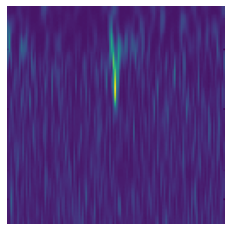

In [22]:
index = 381
data_sample = valid_trf_ds[index]
show(data_sample)

./dataset_4s/validation/1080Lines/glitch_validation_4s_19.png
label: 0


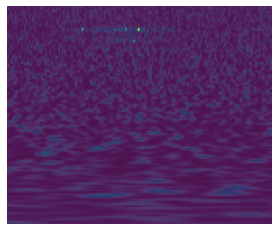

In [23]:
index = 0
print(original_ds.paths[index])
data_sample = original_ds[index]
show(data_sample)

In [24]:
dls = DataLoaders.from_dsets(train_ds, valid_ds, bs=batch_size, device=device)
dls_trf = DataLoaders.from_dsets(train_trf_ds, valid_trf_ds, bs=batch_size, device=device)

In [25]:
criterion = nn.CrossEntropyLoss()
opt_func = Adam
metrics = [accuracy,F1Score(average='macro')]
log_path = Path('/content/gdrive/MyDrive/GW_QML_project/GW_Samuel/logs')

#**Results preparation**

In [26]:
def get_parameters(model):
  return {name: param.cpu().detach().numpy() for name, param in model.named_parameters()}

In [27]:
def print_metrics(y_pred, y_true):
  acc = sk.metrics.accuracy_score(y_true, y_pred) * 100
  recmacro = sk.metrics.recall_score(y_true, y_pred, average='macro') * 100
  premacro = sk.metrics.precision_score(y_true, y_pred, average='macro') * 100
  f1macro = sk.metrics.f1_score(y_true, y_pred, average='macro', zero_division = 0) * 100
  rec = sk.metrics.recall_score(y_true, y_pred, average=None)
  pre = sk.metrics.precision_score(y_true, y_pred, average=None)
  f1 = sk.metrics.f1_score(y_true, y_pred, average=None)
  
  print(f'Overall accuracy: {acc:.2f}%')
  print(f'Overall recall: {recmacro:.2f}%')
  print(f'Overall precision: {premacro:.2f}%')
  print(f'Macro-averaged F1-score: {f1macro:.2f}%')
  print()
  print(f'Recall: {rec}')
  print(f'Precision: {pre}')
  print(f'F1-score: {f1}')

In [28]:
def plot_precision_recall_curve(probs, y_true, figsize=(10,10), pos_label=None):
  precision, recall, thresholds = sk.metrics.precision_recall_curve(y_true, probs, pos_label=1)
  pr_display = sk.metrics.PrecisionRecallDisplay(precision=precision, recall=recall).plot()
  plt.show()

In [47]:
def save_confusion_matrix(y_pred, y_true, normalize = None, figsize=(10,10), labels = None):

  """
  normalize can be 'true', 'pred', 'all' or None
  """
  confusion_matrix = sk.metrics.confusion_matrix(y_true, y_pred, normalize=normalize)
  confusion_matrix = np.round(confusion_matrix,2)
  print(list(confusion_matrix))
  cm_display = sk.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels)
  fig, ax = plt.subplots(figsize=figsize)
  cm_display.plot(ax=ax,cmap=plt.cm.Blues)
  #plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.xticks(rotation=90)
  #plt.colorbar()
  plt.savefig('confusion_matrix.png')
  plt.show()

In [30]:
def test_learner(preds, targs):
  y_pred = tensor([np.argmax(pred) for pred in preds])
  return y_pred, targs

In [35]:
#model_name = 'SL_model_26.pth'
#model_name = 'SSL_model_8.pth'
model_name = 'SL_on_SLL_model_24.pth'

dls_final = dls
#dls_final = dls_trf

ds_test = test_ds
#ds_test = test_trf_ds

num_classes = len(train_ds.folders)
#num_classes = len(transform_SSL)

gw_ds = SL_dataset('./GW_dataset/',transform = transforms.Resize((128,128)),convert_RGB=True)

label: 3


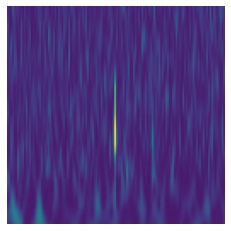

In [32]:
#blip
index = 310
data_sample = test_ds[index]
show(data_sample)

label: 4


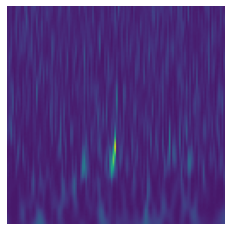

In [33]:
#chirp
index = 380
data_sample = test_ds[index]
show(data_sample)

label: 0
1080Lines

solution: Blip/chirp (signal)
answer: No glicth (background)


NameError: ignored

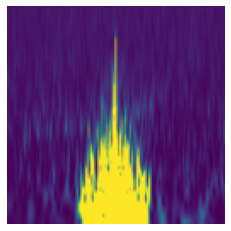

In [34]:
index = 5
data_sample = gw_ds[index]
show(data_sample)
names = ['Blip/chirp (signal)','No glicth (background)','Other glitch']
solutions=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
answers=[0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2]
print(train_ds.label_names[data_sample[1]])
print()
print(f'solution: {names[solutions[index]]}')
print(f'answer: {names[answers[index]]}')
print(f'Prob: {nn.Softmax(dim=0)(preds[:,index]).max()}')

In [36]:
learn_final = Learner(dls=dls_final,
                model=models.resnet18(num_classes=num_classes),
                path=log_path,
                loss_func=criterion,
                opt_func=opt_func,
                metrics=metrics)

In [37]:
state_dict = torch.load('/content/gdrive/MyDrive/GW_Samuel/logs/saved_models/'+model_name, map_location=torch.device('cpu'))
learn_final.model.load_state_dict(state_dict)

<All keys matched successfully>

In [38]:
dl_test = learn_final.dls.test_dl(ds_test, bs=batch_size) # apply transforms
preds, targs = learn_final.get_preds(dl=dl_test) # get prediction

In [ ]:
test_img = torch.unsqueeze(ds_test[100][0], dim=0)
res18_model = learn_final.model
res18_conv = nn.Sequential(*list(res18_model.children())[:-8])
for param in res18_conv.parameters():
    param.requires_grad = False
outputs = res18_conv(test_img)
print(outputs.shape)
out = torch.mean(outputs, 1)
plt.imshow(out[0])

In [39]:
# 3 - blip
# 4 - chirp
# 6 - helix
# 11 - No glitch
# 
y_pred, y_true = test_learner(preds, targs)
# probs = nn.Softmax(dim=1)(preds)
# print(y_true)
# print(y_pred)
# print(gw_ds.paths)

In [ ]:
y_true_new = [0 if n==3 else 0 if n==4 else 1 if n==11 else 2 for n in y_true]
y_pred_new = [0 if n==3 else 0 if n==4 else 1 if n==11 else 2 for n in y_pred]
print(y_true_new)
print(y_pred_new)

In [40]:
print_metrics(y_pred, y_true)

Overall accuracy: 96.50%
Overall recall: 93.16%
Overall precision: 95.93%
Macro-averaged F1-score: 94.15%

Recall: [1.         1.         0.88888889 0.975      0.9        0.95588235 1.         0.98387097 0.98837209 0.94897959 0.97058824 1.         0.69230769 1.         1.         0.83333333 1.         1.
 0.94444444 0.97183099 0.57142857 0.86956522]
Precision: [0.98       0.94594595 1.         0.975      1.         1.         1.         0.96825397 0.87628866 1.         0.97058824 0.84375    0.81818182 1.         0.98550725 0.92105263 1.         1.
 0.89473684 0.97183099 1.         0.95238095]
F1-score: [0.98989899 0.97222222 0.94117647 0.975      0.94736842 0.97744361 1.         0.976      0.92896175 0.97382199 0.97058824 0.91525424 0.75       1.         0.99270073 0.875      1.         1.
 0.91891892 0.97183099 0.72727273 0.90909091]


[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.  , 0.  , 0.89, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]), array([0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ]), array([0. , 0. , 0. , 0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]), array([0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]), array([0.  , 0.  , 0.  , 

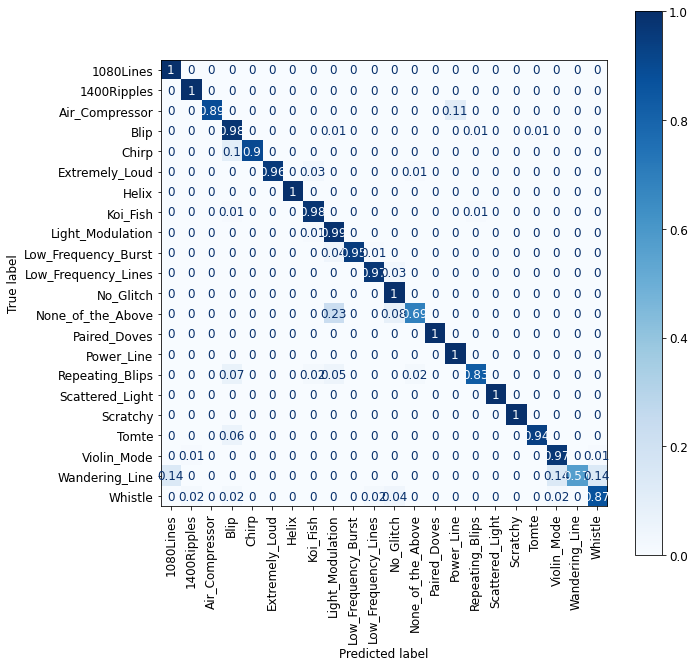

In [48]:
save_confusion_matrix(y_pred, y_true, normalize='true', figsize = (10,10), labels = ds_test.label_names) # figsize = (10,10)

In [56]:
np.array([[0.89, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  ],
 [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
 [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
 [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
 [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
 [0.13, 0.  , 0.  , 0.  , 0.  , 0.87, 0.  ],
 [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

array([[0.89, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.13, 0.  , 0.  , 0.  , 0.  , 0.87, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [ ]:
train_ds.label_names

In [ ]:
gw_ds.label_names

In [ ]:
probs = nn.Softmax(dim=1)(preds)